In [1]:
import re
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns

# sys.path.insert(0, '../')

from jas1101finalproject.GlobularCluster import GlobularCluster
from jas1101finalproject.plot import LogNorm, AsinhNorm
from jas1101finalproject.utils import profile_binning, clip_quantile_nd
from jas1101finalproject.cluster import DBSCAN_Clustering

%load_ext autoreload
%autoreload 2

  0%|          | 0/150 [00:00<?, ?it/s]


KeyboardInterrupt: 

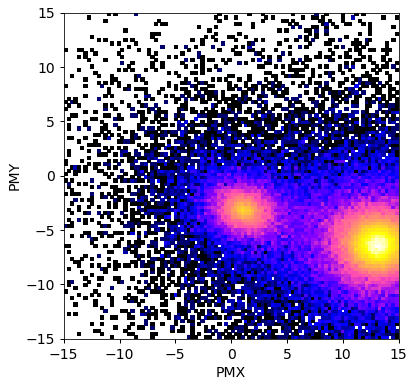

In [161]:
from argparse import Namespace
from jas1101finalproject.data import DATA_PATH

opts = Namespace()
opts.output_dir = DATA_PATH

# from jas1101finalproject.scripts.get_globular_clusters import main
# main(opts=opts)

from jas1101finalproject.scripts.normalize_globular_clusters import main
main(opts=opts)

In [19]:
# from jas1101finalproject.scripts import normalize_globular_clusters
# normalize_globular_clusters.main(opts=opts)

## Example 1 :Tuc 47

In [148]:
GC = GlobularCluster.from_name('NGC_104_47Tuc', member_threshold=0.)

Text(0, 0.5, 'Y')

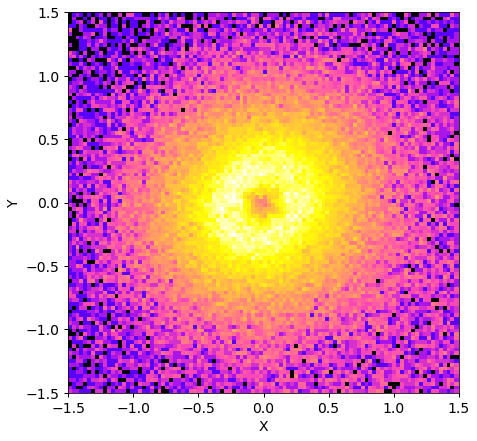

In [149]:
plt.figure(figsize=(7,7))
H, xb, yb, _ = plt.hist2d(GC.x, GC.y, bins=100, range=[[-1.5,1.5],[-1.5,1.5]], norm=LogNorm(), cmap="gnuplot2")
plt.xlabel("X")
plt.ylabel("Y")

Text(0.5, 0, 'R')

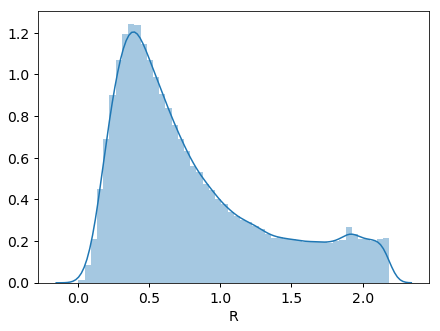

In [150]:
sns.distplot(GC.r)
plt.xlabel("R")

Text(0, 0.5, 'PMY')

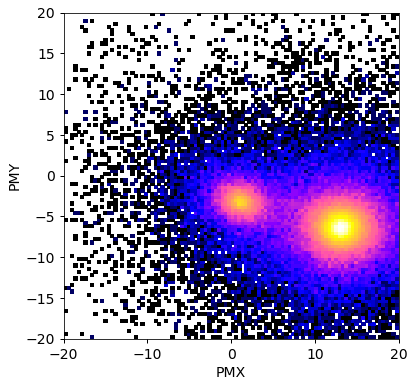

In [151]:
from matplotlib import colors
plt.figure(figsize=(6,6))
H, xb, yb, _ = plt.hist2d(GC.pmx, GC.pmy, bins=100, range=[[-20,20],[-20,20]], norm=colors.LogNorm(), cmap="gnuplot2")
plt.xlabel("PMX")
plt.ylabel("PMY")

Text(0, 0.5, 'PM')

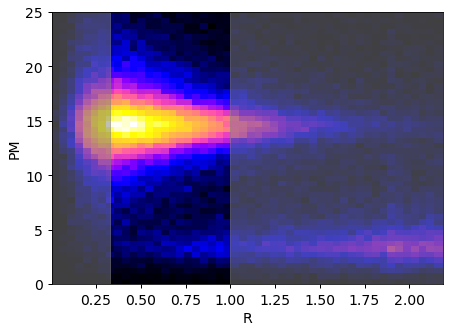

In [152]:
sel = GC.pm < 25
H, xb, yb, _ = plt.hist2d(GC.r[sel], GC.pm[sel], bins=50, norm=AsinhNorm(), cmap="gnuplot2")

plt.axvspan(0, 0.33, 0, color="gray", alpha=0.5)
plt.axvspan(1, 2.2, 0, color="gray", alpha=0.5)
plt.xlabel("R") # normalized
plt.ylabel("PM")

In [153]:
X0 = np.vstack([GC.r, GC.pmx, GC.pmy]).T
good_pm = clip_quantile_nd(X0, z_quantile=[0.001, 0.999], ind_clip=[1,2])
good_r = (X0[:,0]>0.25) & (X0[:,0]<1)

X = X0[good_pm & good_r]

In [154]:
clus = DBSCAN_Clustering(X)
clus.run_clustering(plot=False)          # if use DBSCAN : eps = 0.5

Clustering using HDBSCAN
Clustering Finished: 2 components


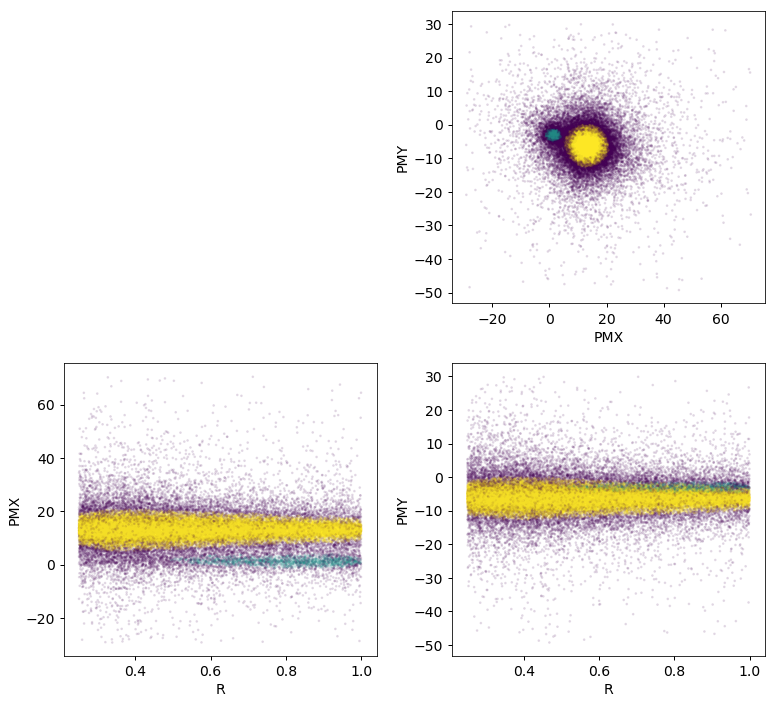

In [155]:
clus.plot_clustering()

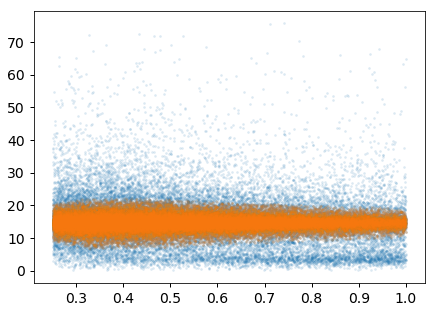

In [156]:
is_mp = clus.predict_main_pop()

pm = np.hypot(X[:,1], X[:,2])
plt.scatter(X[:,0], pm, s=3, alpha=0.1)
plt.scatter(X[is_mp][:,0], pm[is_mp],
            s=3, alpha=0.1)

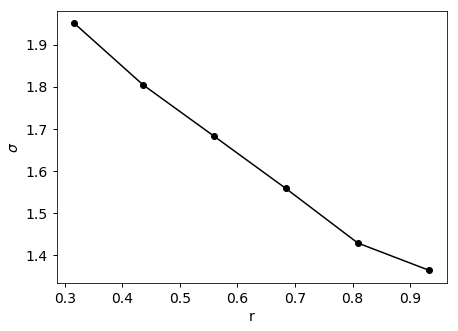

In [157]:
from jas1101finalproject.plot import plot_binned_std_profile
fig = plot_binned_std_profile(r=X[is_mp][:,0],
                              pm=pm[is_mp],
                              bins=np.linspace(0.25, 1, 7))

In [158]:
member_prob = np.zeros(len(X0))
member_prob[np.where(good_pm & good_r)[0][is_mp]] = 1

sel = member_prob > 0.8

Text(0, 0.5, 'PMY')

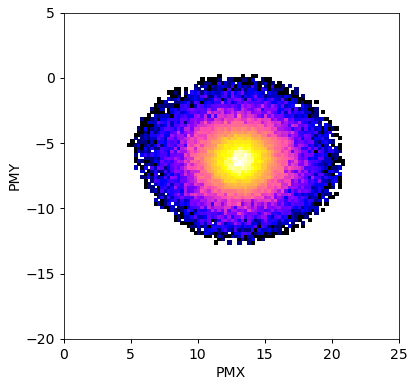

In [159]:
from matplotlib import colors
plt.figure(figsize=(6,6))
H, xb, yb, _ = plt.hist2d(GC.pmx[sel], GC.pmy[sel], bins=100,
                          range=[[0,25],[-20,5]], norm=colors.LogNorm(), cmap="gnuplot2")
plt.xlabel("PMX")
plt.ylabel("PMY")

((array([-4.245182  , -4.04191316, -3.93118658, ...,  3.93118658,
          4.04191316,  4.245182  ]),
  array([ 6.7269697 ,  6.77172234,  6.77999726, ..., 22.18208407,
         22.19884399, 22.2532489 ])),
 (2.0237725637490858, 14.71509946471809, 0.9941721844147464))

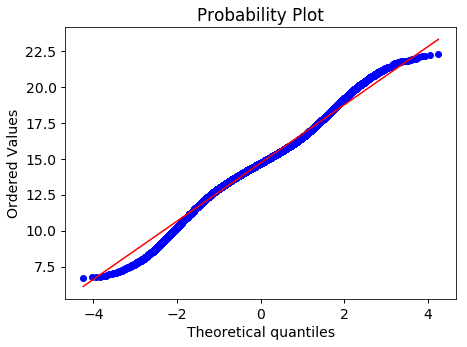

In [160]:
from scipy import stats

stats.probplot(GC.pm[sel], dist='norm', plot=plt.gca())

## Example 2 : M22

In [94]:
GC = GlobularCluster.from_name('NGC_6656_M_22', member_threshold=0.)

Text(0, 0.5, 'Y')

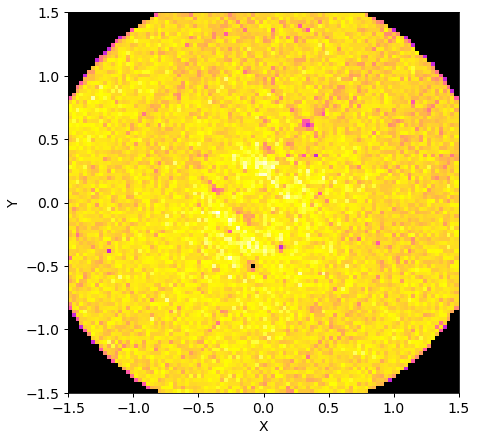

In [95]:
plt.figure(figsize=(7,7))
H, xb, yb, _ = plt.hist2d(GC.x, GC.y, bins=100,
                          range=[[-1.5,1.5],[-1.5,1.5]], norm=LogNorm(), cmap="gnuplot2")
plt.xlabel("X")
plt.ylabel("Y")

Text(0, 0.5, 'PMY')

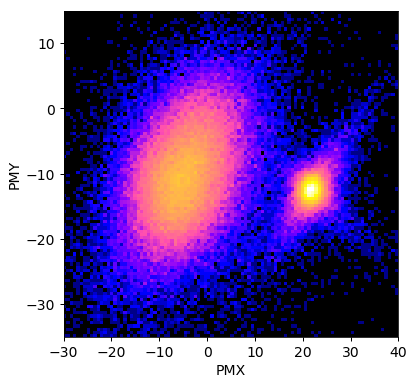

In [97]:
plt.figure(figsize=(6,6))
H, xb, yb, _ = plt.hist2d(GC.pmx, GC.pmy, bins=100,
                          range=[[-30,40],[-35,15]], norm=LogNorm(), cmap="gnuplot2")
plt.xlabel("PMX")
plt.ylabel("PMY")

Text(0, 0.5, 'PM')

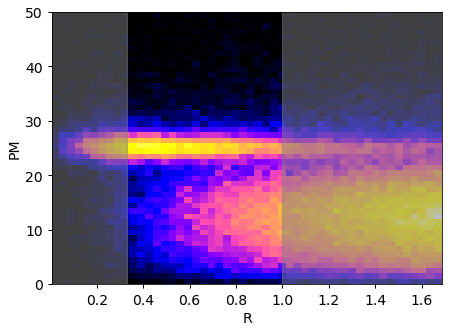

In [98]:
sel = GC.pm < 50
H, xb, yb, _ = plt.hist2d(GC.r[sel], GC.pm[sel], bins=50, norm=AsinhNorm(), cmap="gnuplot2")

plt.axvspan(0, 0.33, 0, color="gray", alpha=0.5)
plt.axvspan(1, 2.2, 0, color="gray", alpha=0.5)
plt.xlabel("R") # normalized
plt.ylabel("PM")

In [99]:
X0 = np.vstack([GC.r, GC.pmx, GC.pmy]).T
good_pm = clip_quantile_nd(X0, z_quantile=[0.001, 0.999], ind_clip=[1,2])
good_r = (X0[:,0]>0) & (X0[:,0]<1)

X = X0[good_pm & good_r]

In [100]:
clus = DBSCAN_Clustering(X)
clus.run_clustering(plot=False)          # if use DBSCAN : eps = 0.3

Clustering using HDBSCAN
Clustering Finished: 2 components


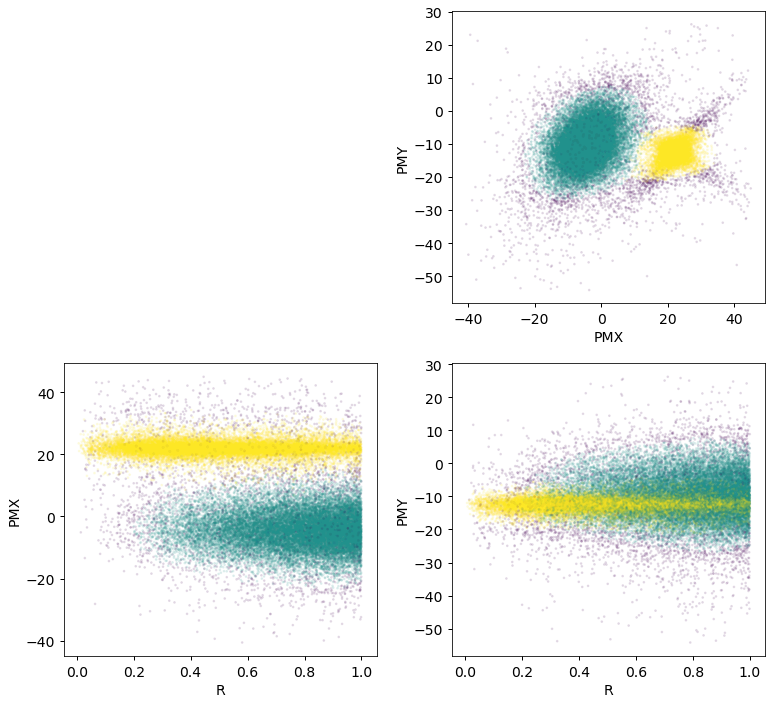

In [101]:
clus.plot_clustering()

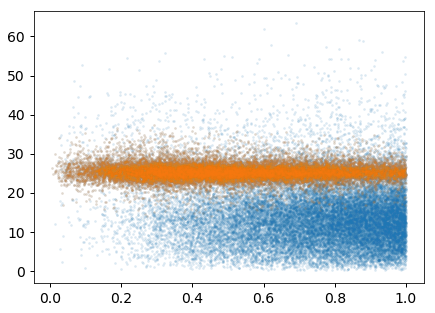

In [102]:
is_mp = clus.predict_main_pop()

pm = np.hypot(X[:,1], X[:,2])
plt.scatter(X[:,0], pm, s=3, alpha=0.1)
plt.scatter(X[is_mp][:,0], pm[is_mp],
            s=3, alpha=0.1)

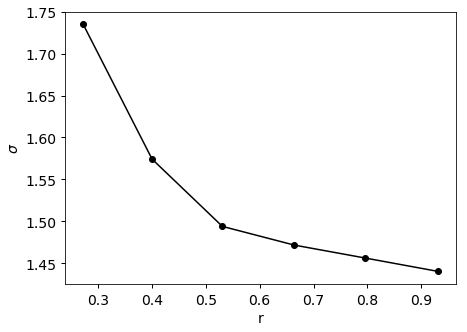

In [111]:
fig = plot_binned_std_profile(r=X[is_mp][:,0],
                              pm=pm[is_mp],
                              bins=np.linspace(0.2, 1, 7))

((array([-4.39187084, -4.19507403, -4.08810477, ...,  4.08810477,
          4.19507403,  4.39187084]),
  array([4.42540508e-02, 5.28083722e-02, 6.56065590e-02, ...,
         4.99131026e+01, 4.99406249e+01, 4.99551925e+01])),
 (7.812844244529242, 15.962628540752727, 0.9867099971611871))

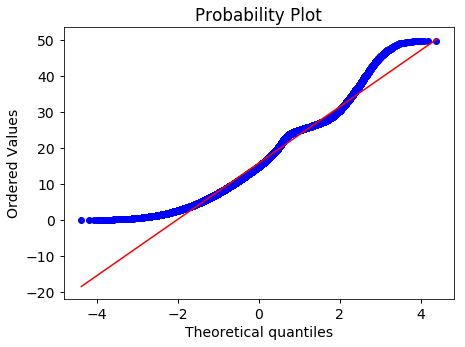

In [104]:
stats.probplot(GC.pm[sel], dist='norm', plot=plt.gca())

## Example 2 : Pal_1

In [123]:
GC = GlobularCluster.from_name('Pal_1', member_threshold=0.)

Text(0, 0.5, 'Y')

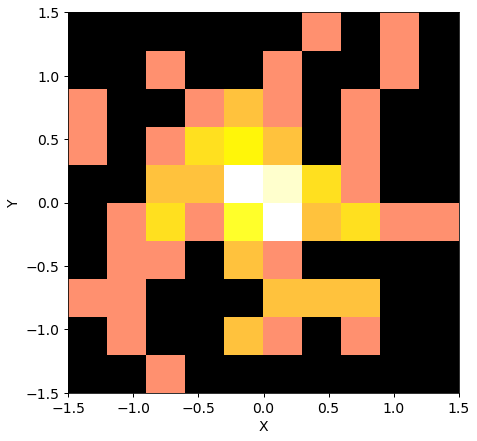

In [126]:
plt.figure(figsize=(7,7))
H, xb, yb, _ = plt.hist2d(GC.x, GC.y, bins=10, range=[[-1.5,1.5],[-1.5,1.5]], norm=LogNorm(), cmap="gnuplot2")
plt.xlabel("X")
plt.ylabel("Y")

Text(0, 0.5, 'PMY')

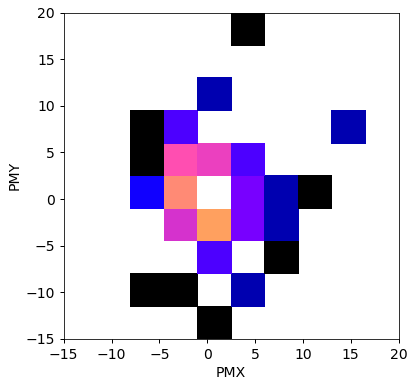

In [131]:
from matplotlib import colors
plt.figure(figsize=(6,6))
H, xb, yb, _ = plt.hist2d(GC.pmx, GC.pmy, bins=10, range=[[-15,20],[-15,20]], norm=colors.LogNorm(), cmap="gnuplot2")
plt.xlabel("PMX")
plt.ylabel("PMY")

In [132]:
X0 = np.vstack([GC.r, GC.pmx, GC.pmy]).T
good_pm = clip_quantile_nd(X0, z_quantile=[0.001, 0.999], ind_clip=[1,2])
good_r = (X0[:,0]>0) & (X0[:,0]<1)

X = X0[good_pm & good_r]

In [140]:
clus = DBSCAN_Clustering(X)
clus.run_clustering(plot=False)          # DBSCAN : eps = 0.3

Clustering using HDBSCAN
Clustering Finished: 4 components


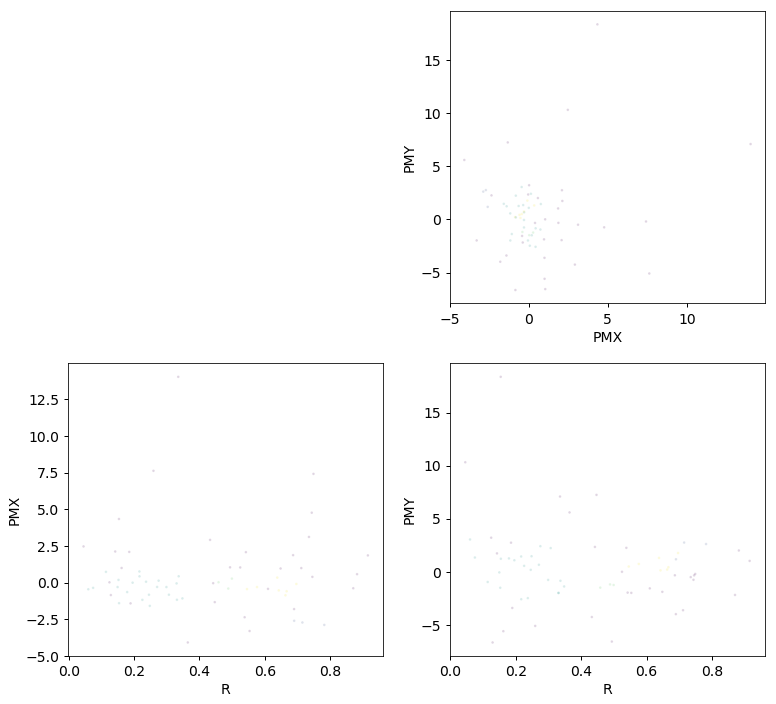

In [141]:
clus.plot_clustering()

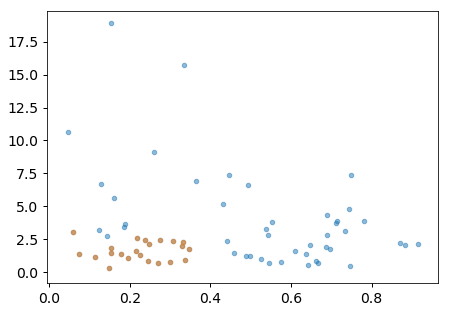

In [145]:
is_mp = clus.predict_main_pop()

pm = np.hypot(X[:,1], X[:,2])
plt.scatter(X[:,0], pm, s=20, alpha=0.5)
plt.scatter(X[is_mp][:,0], pm[is_mp],
            s=20, alpha=0.5)